In [1]:
import time

# Começa a contagem do tempo
start_time = time.time()

In [2]:
!pip install keras==3.1.1
!pip install tensorflow==2.11.0
!pip install optuna
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as sio
import keras
import numpy as np
from keras import backend as K
import seaborn as sns
from scipy.stats import gaussian_kde
import optuna
from sklearn.preprocessing import MinMaxScaler
import os
import re
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Lambda, Dropout
from keras.initializers import GlorotNormal, HeNormal
from keras.models import Model
import pandas as pd
import scipy.io as sio
import keras
from keras import backend as K
import seaborn as sns
from scipy.stats import gaussian_kde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.1 requires keras>=3.2.0, but you have keras 3.1.1 which is incompatible.
ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.11.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 7.0 MB/s e

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Função para extrair números do nome do arquivo
def ordenar_numericamente(nome_arquivo):
    # Acha todos os números no nome do arquivo
    numeros = re.findall(r'\d+', nome_arquivo)
    # Converte os números encontrados para inteiros e retorna como uma tupla
    return tuple(map(int, numeros))

diretorio1 = '/content/drive/MyDrive/Dados de Corrugação Segmentados/Accel_Rail_Midspan_Lft - Dados/1st-novo'
diretorio2 = '/content/drive/MyDrive/Dados de Corrugação Segmentados/Accel_Rail_Midspan_Lft - Dados/3rd-novo'
diretorio3 = '/content/drive/MyDrive/Dados de Corrugação Segmentados/Accel_Rail_Midspan_Lft - Dados/5th-novo'

arquivos_1 = sorted(os.listdir(diretorio1), key=ordenar_numericamente)
arquivos_2 = sorted(os.listdir(diretorio2), key=ordenar_numericamente)
arquivos_3 = sorted(os.listdir(diretorio3), key=ordenar_numericamente)

print(arquivos_1)
print(arquivos_2)
print(arquivos_3)

['1st_corr1_1_segment1_var1.mat', '1st_corr1_1_segment1_var2.mat', '1st_corr1_1_segment1_var3.mat', '1st_corr1_1_segment1_var4.mat', '1st_corr1_1_segment1_var5.mat', '1st_corr1_1_segment1_var6.mat', '1st_corr1_1_segment1_var7.mat', '1st_corr1_1_segment1_var8.mat', '1st_corr1_1_segment1_var9.mat', '1st_corr1_1_segment1_var10.mat', '1st_corr1_1_segment2_var1.mat', '1st_corr1_1_segment2_var2.mat', '1st_corr1_1_segment2_var3.mat', '1st_corr1_1_segment2_var4.mat', '1st_corr1_1_segment2_var5.mat', '1st_corr1_1_segment2_var6.mat', '1st_corr1_1_segment2_var7.mat', '1st_corr1_1_segment2_var8.mat', '1st_corr1_1_segment2_var9.mat', '1st_corr1_1_segment2_var10.mat', '1st_corr1_1_segment3_var1.mat', '1st_corr1_1_segment3_var2.mat', '1st_corr1_1_segment3_var3.mat', '1st_corr1_1_segment3_var4.mat', '1st_corr1_1_segment3_var5.mat', '1st_corr1_1_segment3_var6.mat', '1st_corr1_1_segment3_var7.mat', '1st_corr1_1_segment3_var8.mat', '1st_corr1_1_segment3_var9.mat', '1st_corr1_1_segment3_var10.mat', '1st_c

(100, 3916)


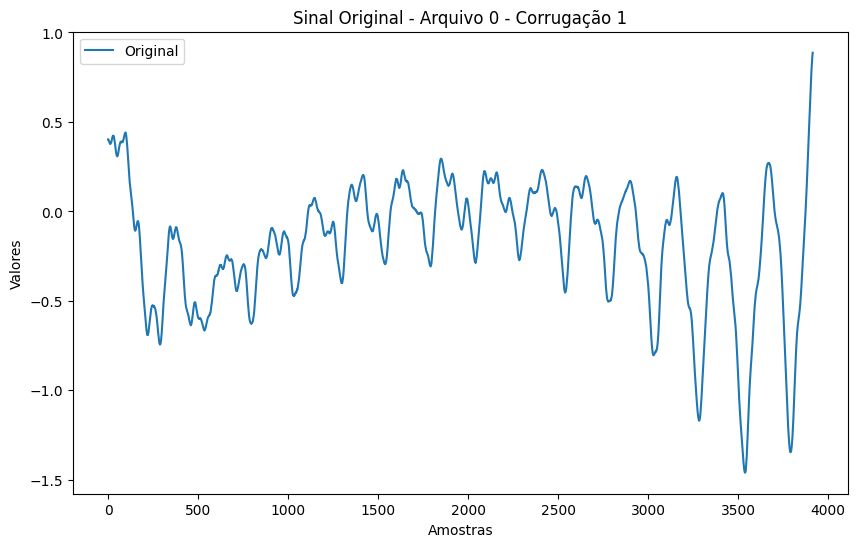

In [6]:
# Carregar os dados de Irregularidade 1
corr1 = []
arquivos_corr1 = os.listdir(diretorio1)
for arquivo in arquivos_corr1[:100]:
    if arquivo.endswith(".mat"):
        caminho_arquivo = os.path.join(diretorio1, arquivo)
        arquivo_mat = sio.loadmat(caminho_arquivo)
        dados = arquivo_mat['segment'][:,0]
        corr1.append(dados)

corr1 = np.array(corr1)
print(corr1.shape)

plt.figure(figsize=(10, 6))
plt.plot(corr1[10], label='Original')  # Corrigido para massa0[50]
plt.title('Sinal Original - Arquivo 0 - Corrugação 1')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.legend()
plt.show()

(100, 3916)


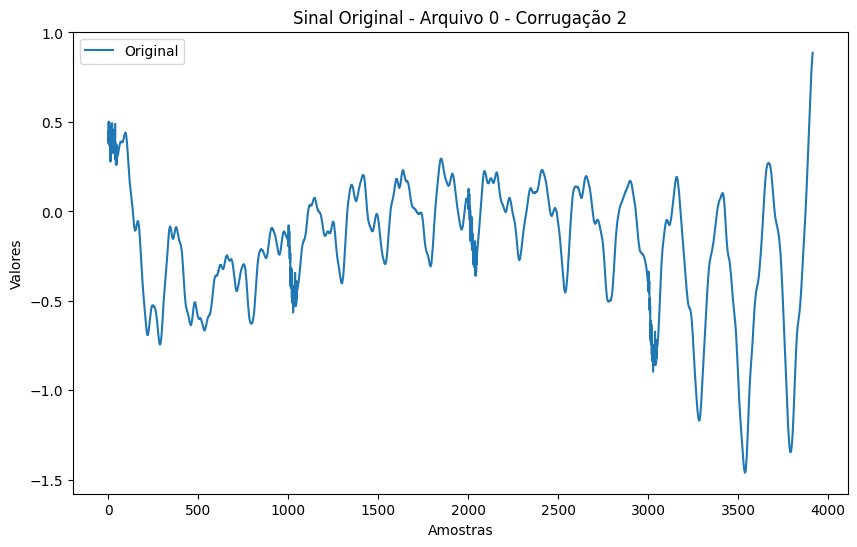

In [8]:
# Carregar os dados de Irregularidade 2
corr2 = []
arquivos_corr2 = os.listdir(diretorio2)
for arquivo in arquivos_corr2[:100]:
    if arquivo.endswith(".mat"):
        caminho_arquivo = os.path.join(diretorio2, arquivo)
        arquivo_mat = sio.loadmat(caminho_arquivo)
        dados = arquivo_mat['segment'][:, 0]
        corr2.append(dados)

corr2 = np.array(corr2)
print(corr2.shape)

plt.figure(figsize=(10, 6))
plt.plot(corr2[10], label='Original')  # Corrigido para massa0[50]
plt.title('Sinal Original - Arquivo 0 - Corrugação 2')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.legend()
plt.show()

(100, 3916)


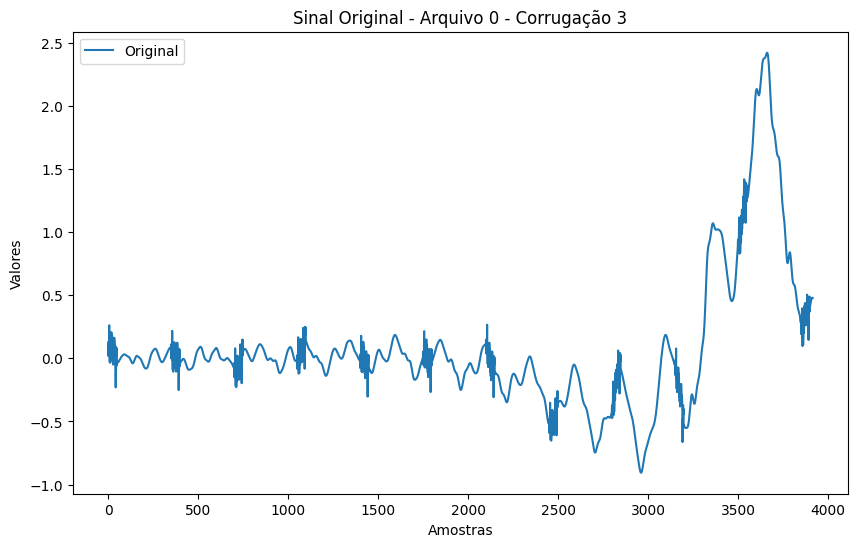

In [9]:
corr3 = []
arquivos_corr3 = os.listdir(diretorio3)
for arquivo in arquivos_corr3[:100]:
    if arquivo.endswith(".mat"):
        caminho_arquivo = os.path.join(diretorio3, arquivo)
        arquivo_mat = sio.loadmat(caminho_arquivo)
        dados = arquivo_mat['segment'][:, 0]

        # Verificar se o comprimento dos dados é 3916 antes de adicionar
        if len(dados) == 3916:
            corr3.append(dados)

# Converter para um array numpy
corr3 = np.array(corr3)

# Exibir o formato do array e plotar o primeiro elemento
print(corr3.shape)

plt.figure(figsize=(10, 6))
plt.plot(corr3[0], label='Original')
plt.title('Sinal Original - Arquivo 0 - Corrugação 3')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.legend()
plt.show()

In [10]:
corr1 = np.expand_dims(corr1, axis=-1)
corr2 = np.expand_dims(corr2, axis=-1)
corr3 = np.expand_dims(corr3, axis=-1)
print(corr1.shape)
print(corr2.shape)
print(corr3.shape)

(100, 3916, 1)
(100, 3916, 1)
(100, 3916, 1)


In [11]:
import optuna
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [12]:
def create_and_train_cae(trial):
    input_shape = corr1.shape[1:]

    # Definir faixa de hiperparâmetros para o Optuna
    latent_dim = trial.suggest_int('latent_dim', 50, 300)
    learning_rate = trial.suggest_float('learning_rate', 1e-7, 1e-3, log=True)
    batch_size = trial.suggest_int('batch_size', 2, 56)
    epochs = trial.suggest_int('epochs', 10, 300)

    # Definição do CAE
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Conv1D(32, 3, activation='relu', padding='same')(inputs)
    x = keras.layers.MaxPooling1D(2, padding='same')(x)
    x = keras.layers.Conv1D(64, 3, activation='relu', padding='same')(x)
    encoded = keras.layers.MaxPooling1D(2, padding='same')(x)

    x = keras.layers.Conv1D(64, 3, activation='relu', padding='same')(encoded)
    x = keras.layers.UpSampling1D(2)(x)
    x = keras.layers.Conv1D(32, 3, activation='relu', padding='same')(x)
    x = keras.layers.UpSampling1D(2)(x)
    decoded = keras.layers.Conv1D(1, 3, activation='linear', padding='same')(x)

    cae = keras.Model(inputs, decoded)
    cae.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Dividir corr1 em treino e teste
    np.random.shuffle(corr1)
    corr1_train, corr1_test = corr1[:35], corr1[35:]

    # Treinamento
    cae.fit(corr1_train, corr1_train, epochs=epochs, batch_size=batch_size, shuffle=True, verbose=0)

    # Avaliação de reconstrução para cálculo do erro residual médio
    corr1_recon_train = cae.predict(corr1_train)
    corr1_recon_test = cae.predict(corr1_test)
    corr2_recon = cae.predict(corr2)
    corr3_recon = cae.predict(corr3)

    error_train = np.mean(np.square(corr1_train - corr1_recon_train), axis=1)
    error_test = np.mean(np.square(corr1_test - corr1_recon_test), axis=1)
    error_corr2 = np.mean(np.square(corr2 - corr2_recon), axis=1)
    error_corr3 = np.mean(np.square(corr3 - corr3_recon), axis=1)

    # Erro médio de reconstrução
    reconstruction_error = np.mean(np.concatenate([error_train, error_test, error_corr2, error_corr3]))

    # Função para plotar sinais
    #def plot_signals(original, reconstructed, title, color_orig="blue", color_recon="orange"):
        #plt.figure(figsize=(12, 6))
        #for i in range(len(original)):
            #plt.plot(np.abs(original[i]), color=color_orig, label=f'Sinal {i+1} (Original)')
            #plt.plot(np.abs(reconstructed[i]), color=color_recon, label=f'Sinal {i+1} (Reconstruído)')
        #plt.xlabel('Frequência (Hz)')
        #plt.ylabel('Amplitude (m/s²)')
        #plt.title(title)
        #plt.show()

    def plot_signals(original, reconstructed, title, color_orig="blue", color_recon="orange"):
        plt.figure(figsize=(12, 6))
        for i in range(len(original)):
            plt.plot(np.abs(original[i]), color=color_orig, label='Original Signal' if i == 0 else "")
            plt.plot(np.abs(reconstructed[i]), color=color_recon, label='Reconstructed Signal' if i == 0 else "")
        plt.xlabel('Position (m)', fontsize=18)
        plt.ylabel('Acceleration (m/s²)', fontsize=18)
        plt.title(f"{title}", fontsize=20, fontweight='bold')
        plt.legend(fontsize=16, loc='upper right')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Plotar sinais originais e reconstruídos para cada repetição
    plot_signals(corr1_train, corr1_recon_train, '(a)')
    plot_signals(corr1_test, corr1_recon_test, '(b)')
    plot_signals(corr2, corr2_recon, '(c)')
    plot_signals(corr3, corr3_recon, '(d)')

    return reconstruction_error

[I 2025-01-25 20:49:37,191] A new study created in memory with name: no-name-90329b3a-ffeb-4649-9de9-e04c1a789719


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


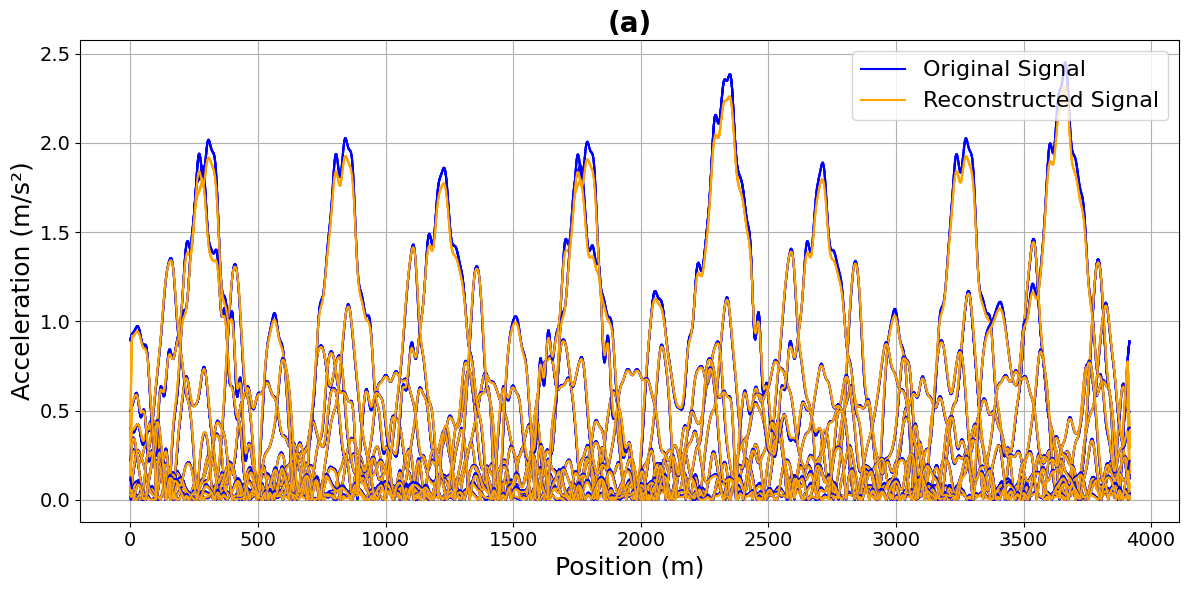

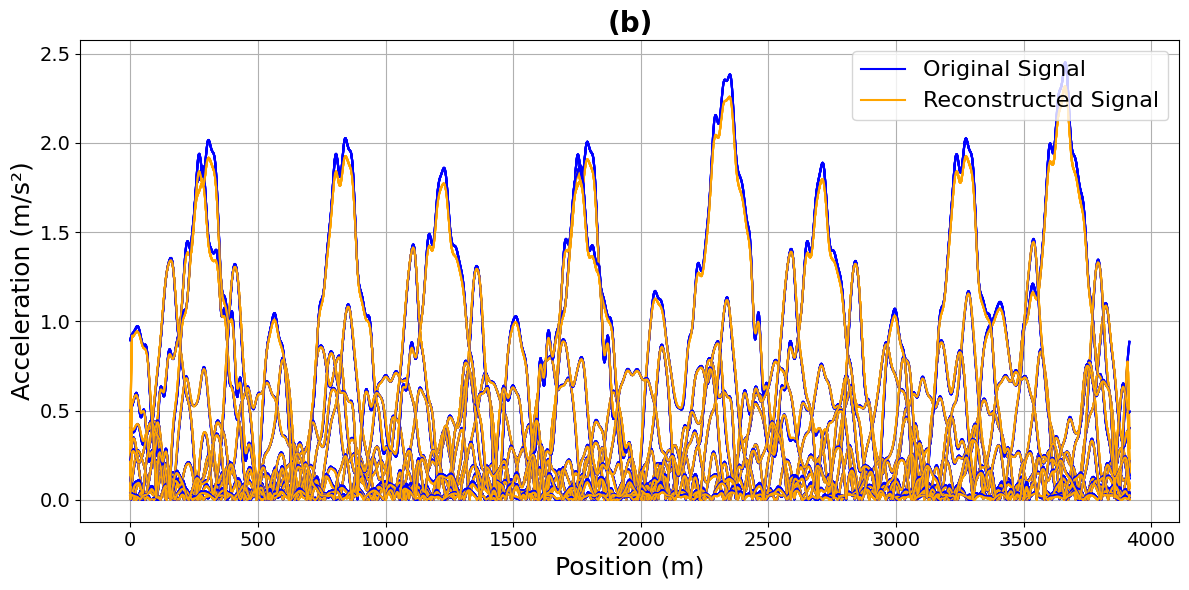

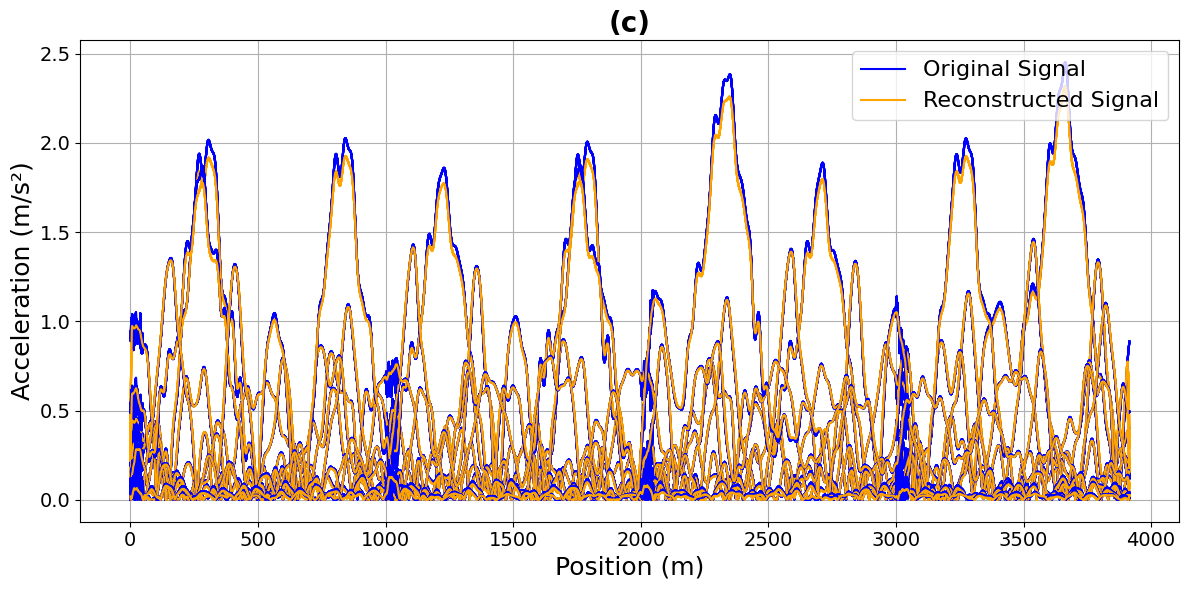

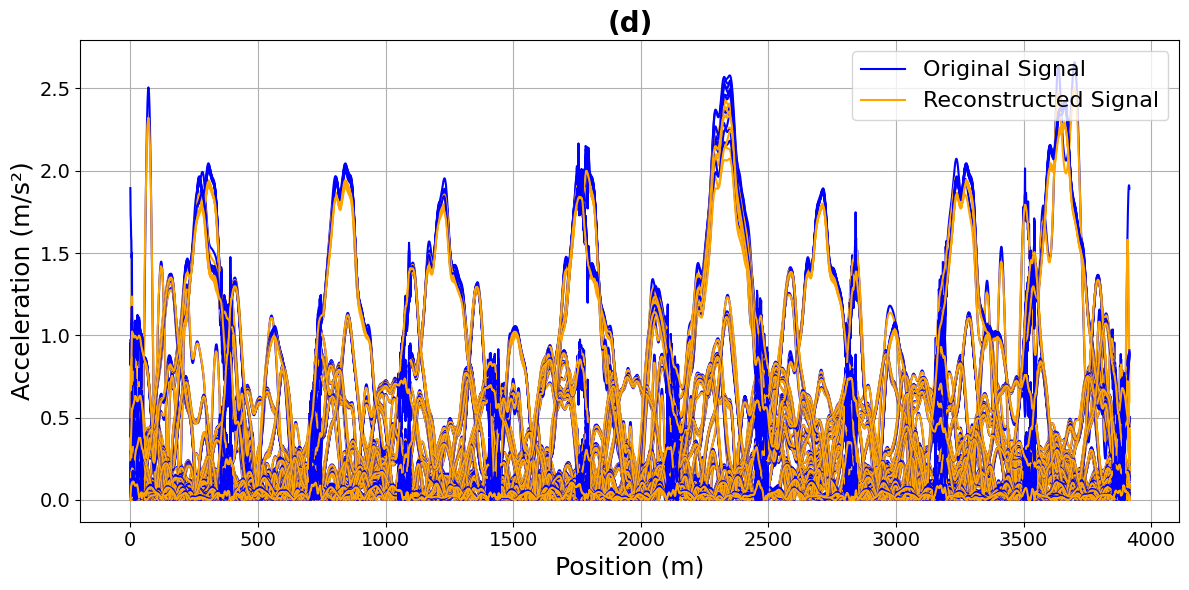

[I 2025-01-25 20:50:03,640] Trial 0 finished with value: 0.0007259058476120358 and parameters: {'latent_dim': 101, 'learning_rate': 0.0007108237563210667, 'batch_size': 45, 'epochs': 57}. Best is trial 0 with value: 0.0007259058476120358.
[W 2025-01-25 20:50:07,257] Trial 1 failed with parameters: {'latent_dim': 185, 'learning_rate': 5.154910288322371e-07, 'batch_size': 33, 'epochs': 153} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-12-3b25d1ee1131>", line 31, in create_and_train_cae
    cae.fit(corr1_train, corr1_train, epochs=epochs, batch_size=batch_size, shuffle=True, verbose=0)
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  

KeyboardInterrupt: 

In [13]:
# Executando o estudo com Optuna
study = optuna.create_study(direction="minimize")
study.optimize(create_and_train_cae, n_trials=50)

In [ ]:
# Imprime os melhores hiperparâmetros
print("Melhores parâmetros:")
print(study.best_params)

# Resultados finais
print("Melhor erro de reconstrução:", study.best_value)

Melhores parâmetros:
{'latent_dim': 157, 'learning_rate': 0.0006881709059746539, 'batch_size': 5, 'epochs': 283}
Melhor erro de reconstrução: 0.00029046139817241333


In [ ]:
latent_dim= 100
learning_rate= 0.00018540401906498043
batch_size= 3
epochs= 129

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Definição dos parâmetros do CAE
input_shape = corr1.shape[1:]

# Número de repetições desejadas
num_repeticoes = 25

# Lista para armazenar os erros residuais de cada repetição
erros_residuais_por_repeticao = []

# Lista para armazenar os erros residuais totais
erros_residuais_totais = []

resi_latente_train_acumulado = []
resi_latente_teste_acumulado = []
resi_latente_corr2_acumulado = []
resi_latente_corr3_acumulado = []




for repeticao in range(num_repeticoes):
    print(f'Repetição {repeticao + 1}')

    # Definição do modelo CAE
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Conv1D(32, 3, activation='relu', padding='same')(inputs)
    x = keras.layers.MaxPooling1D(2, padding='same')(x)
    x = keras.layers.Conv1D(64, 3, activation='relu', padding='same')(x)
    encoded = keras.layers.MaxPooling1D(2, padding='same')(x)

    # Criação da representação latente e decodificação
    x = keras.layers.Conv1D(64, 3, activation='relu', padding='same')(encoded)
    x = keras.layers.UpSampling1D(2)(x)
    x = keras.layers.Conv1D(32, 3, activation='relu', padding='same')(x)
    x = keras.layers.UpSampling1D(2)(x)
    decoded = keras.layers.Conv1D(1, 3, activation='linear', padding='same')(x)

    cae = keras.Model(inputs, decoded, name='conv_autoencoder')

    # Compilando o modelo
    cae.compile(optimizer='adam', loss='mean_squared_error')

    # Dividir massa0 em massa0Treino e massa0Teste
    np.random.shuffle(corr1)
    corr1Treino = corr1[:35]
    corr1Teste = corr1[35:]

    # Treinamento do CAE com os dados de Massa 0
    cae.fit(corr1Treino, corr1Treino, epochs=epochs, batch_size=batch_size, shuffle=True, verbose=0)

    # Reconstruir os sinais
    corr1_reconstruidoTreino = cae.predict(corr1Treino)
    corr1_reconstruidoTeste = cae.predict(corr1Teste)
    corr2_reconstruido = cae.predict(corr2)
    corr3_reconstruido = cae.predict(corr3)


    # Calcular os erros residuais e armazená-los
    erroTreino = np.mean(np.square(corr1Treino - corr1_reconstruidoTreino), axis=1)
    erro_corr1Teste = np.mean(np.square(corr1Teste - corr1_reconstruidoTeste), axis=1)
    erro_corr2 = np.mean(np.square(corr2 - corr2_reconstruido), axis=1)
    erro_corr3 = np.mean(np.square(corr3 - corr3_reconstruido), axis=1)

    erros_residuais = np.concatenate([erroTreino, erro_corr1Teste, erro_corr2, erro_corr3])
    erros_residuais_por_repeticao.append(erros_residuais)
    encoder = keras.Model(inputs=cae.input, outputs=cae.layers[3].output)

    # Coletar resíduos da camada latente para Corrugação 1 Treino
    resi_latente_train = cae.predict(corr1Treino)

    # Coletar resíduos da camada latente para Corrugação 1 Teste
    resi_latente_teste = cae.predict(corr1Teste)

    # Coletar resíduos da camada latente para Corrugação 2
    resi_latente_corr2 = cae.predict(corr2)

    # Coletar resíduos da camada latente para Corrugação 3
    resi_latente_corr3 = cae.predict(corr3)

    # Acumular os resíduos da camada latente para Corrugação 1 Treino
    resi_latente_train_acumulado.append(resi_latente_train)

    # Acumular os resíduos da camada latente para Corrugação 1 Teste
    resi_latente_teste_acumulado.append(resi_latente_teste)

    # Acumular os resíduos da camada latente para Corrugação 2
    resi_latente_corr2_acumulado.append(resi_latente_corr2)

    # Acumular os resíduos da camada latente para Corrugação 3
    resi_latente_corr3_acumulado.append(resi_latente_corr3)

# Calcular a média dos erros residuais para cada ponto
media_erros_residuais = np.mean(erros_residuais_por_repeticao, axis=0)

Repetição 1
2/2 [==============================] - 0s 23ms/step
Repetição 2
2/2 [==============================] - 0s 60ms/step
Repetição 3
2/2 [==============================] - 0s 59ms/step
Repetição 4
2/2 [==============================] - 0s 21ms/step
Repetição 5
2/2 [==============================] - 0s 21ms/step
Repetição 6
2/2 [==============================] - 0s 20ms/step
Repetição 7
2/2 [==============================] - 0s 24ms/step
Repetição 8
2/2 [==============================] - 0s 41ms/step
Repetição 9
2/2 [==============================] - 0s 43ms/step
Repetição 10
2/2 [==============================] - 0s 21ms/step


In [ ]:
# Converter as listas acumuladas em matrizes NumPy
resi_latente_train_acumulado = np.array(resi_latente_train_acumulado)
resi_latente_teste_acumulado = np.array(resi_latente_teste_acumulado)
resi_latente_corr2_acumulado = np.array(resi_latente_corr2_acumulado)
resi_latente_corr3_acumulado = np.array(resi_latente_corr3_acumulado)

In [ ]:
# Calcular a média e o desvio padrão dos resíduos da camada latente para cada classe
media_resi_latente_corr1 = np.mean(resi_latente_train_acumulado, axis=(0, 1))
desvio_resi_latente_corr1 = np.std(resi_latente_train_acumulado, axis=(0, 1))
media_resi_latente_teste_corr1 = np.mean(resi_latente_teste_acumulado, axis=(0, 1))
desvio_resi_latente_teste_corr1 = np.std(resi_latente_teste_acumulado, axis=(0, 1))
media_resi_latente_corr2 = np.mean(resi_latente_corr2_acumulado, axis=(0, 1))
desvio_resi_latente_corr2 = np.std(resi_latente_corr2_acumulado, axis=(0, 1))
media_resi_latente_corr3 = np.mean(resi_latente_corr3_acumulado, axis=(0, 1))
desvio_resi_latente_corr3 = np.std(resi_latente_corr3_acumulado, axis=(0, 1))

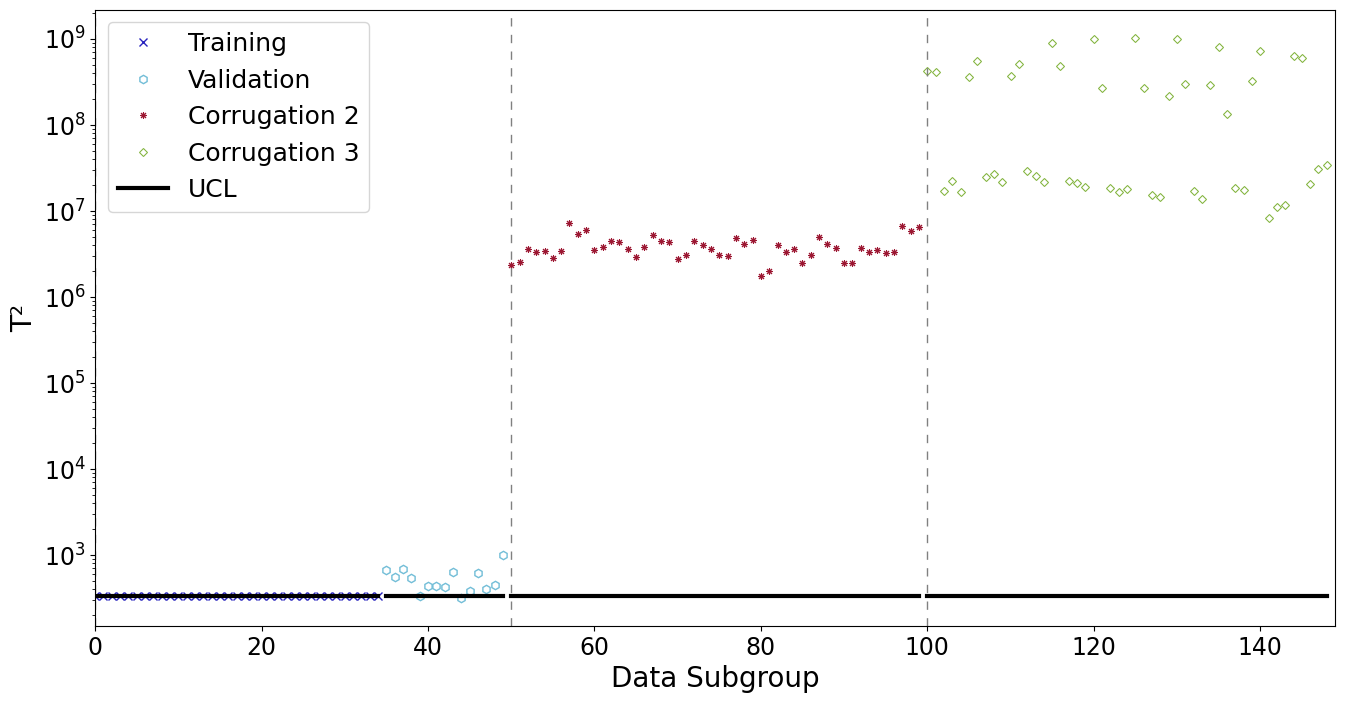

<Figure size 1600x800 with 0 Axes>

In [ ]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

# Parâmetros
r = 10  # Subgroups com r observações de x (quantidade de sinais)
m = latent_dim  # Número de características da camada latente

# Matriz de características da camada latente para treinamento e teste
features_train = np.concatenate(resi_latente_train_acumulado, axis=0)
features_train = features_train[:, :, 0]  # Selecionar apenas as duas primeiras dimensões

features_test = np.concatenate(resi_latente_teste_acumulado, axis=0)
features_test = features_test[:, :, 0]  # Selecionar apenas as duas primeiras dimensões

features_corr2 = np.concatenate(resi_latente_corr2_acumulado, axis=0)
features_corr2 = features_corr2[:, :, 0]  # Selecionar apenas as duas primeiras dimensões

features_corr3 = np.concatenate(resi_latente_corr3_acumulado, axis=0)
features_corr3 = features_corr3[:, :, 0]  # Selecionar apenas as duas primeiras dimensões

# Número de grupos coletados no estado de referência (treinamento) e teste
s_train = len(resi_latente_train_acumulado)
s_test = len(resi_latente_teste_acumulado)
s_corr2 = len(resi_latente_corr2_acumulado)
s_corr3 = len(resi_latente_corr3_acumulado)

# Estimador S1:
S = np.cov(features_train, rowvar=False)  # Matriz de covariância das características da camada latente

# T-squared para a fase de treinamento
x_ref_m = np.mean(features_train, axis=0)  # Média dos dados de treinamento
T_squared_train = []

for i in range(0, len(features_train), r):
    x = features_train[i:i+r, :]  # "Novos" dados
    x_m = np.mean(x, axis=0)  # Média dos "novos" dados
    T_squared_train.append(r * np.dot((x_m - x_ref_m), np.dot(np.linalg.pinv(S), (x_m - x_ref_m))))

# T-squared para a fase de teste
T_squared_test = []

for i in range(0, len(features_test), r):
    x = features_test[i:i+r, :]  # Novos dados
    x_m = np.mean(x, axis=0)  # Média dos novos dados
    T_squared_test.append(r * np.dot((x_m - x_ref_m), np.dot(np.linalg.pinv(S), (x_m - x_ref_m))))

# T-squared para a Corrugação 2
T_squared_corr2 = []

for i in range(0, len(features_corr2), r):
    x = features_corr2[i:i+r, :]  # Novos dados
    x_m = np.mean(x, axis=0)  # Média dos novos dados
    T_squared_corr2.append(r * np.dot((x_m - x_ref_m), np.dot(np.linalg.pinv(S), (x_m - x_ref_m))))

# T-squared para a Corrugação 3
T_squared_corr3 = []

for i in range(0, len(features_corr3), r):
    x = features_corr3[i:i+r, :]  # Novos dados
    x_m = np.mean(x, axis=0)  # Média dos novos dados
    T_squared_corr3.append(r * np.dot((x_m - x_ref_m), np.dot(np.linalg.pinv(S), (x_m - x_ref_m))))

fontsize = 20  # Tamanho da fonte principal
tick_fontsize = 17  # Tamanho da fonte para as escalas

# Calcular o percentil 95 dos valores de T_squared_train
percentile_95 = np.percentile(T_squared_train, 99)

# Definir a UCL como um múltiplo do percentil 95
UCL = percentile_95

# Criar uma lista única de UCL para todas as fases
UCL_axis = np.full(len(T_squared_train) + len(T_squared_test) + len(T_squared_corr2) + len(T_squared_corr3), UCL)

# Plotar carta de controle T^2 de Hotelling para treinamento, teste, Corrugação 2, Corrugação 3
plt.figure(figsize=(16, 8))
plt.plot(np.arange(len(T_squared_train) + len(T_squared_test), len(T_squared_train) + len(T_squared_test) + len(T_squared_corr2)), UCL_axis[len(T_squared_train) + len(T_squared_test):len(T_squared_train) + len(T_squared_test) + len(T_squared_corr2)], 'k', linewidth=3)
plt.plot(np.arange(len(T_squared_train) + len(T_squared_test) + len(T_squared_corr2), len(T_squared_train) + len(T_squared_test) + len(T_squared_corr2) + len(T_squared_corr3)), UCL_axis[len(T_squared_train) + len(T_squared_test) + len(T_squared_corr2):len(T_squared_train) + len(T_squared_test) + len(T_squared_corr2) + len(T_squared_corr3)], 'k', linewidth=3)


plt.plot(np.arange(len(T_squared_train)), T_squared_train, 'x', color='#2924be', label='Training')
plt.plot(np.arange(len(T_squared_train), len(T_squared_train) + len(T_squared_test)), T_squared_test, 'h', color='#71bdd7',fillstyle='none',label='Validation')
plt.plot(np.arange(len(T_squared_train) + len(T_squared_test), len(T_squared_train) + len(T_squared_test) + len(T_squared_corr2)), T_squared_corr2, linestyle='None', marker=(8, 2, 0), markersize=5, mew=0.75,color='#9c1732',label='Corrugation 2')
plt.plot(np.arange(len(T_squared_train) + len(T_squared_test) + len(T_squared_corr2), len(T_squared_train) + len(T_squared_test) + len(T_squared_corr2) + len(T_squared_corr3)), T_squared_corr3, 'D',color='#82b33d', fillstyle='none', markersize=4,mew=0.75,label='Corrugation 3')
plt.plot(np.arange(len(T_squared_train)), UCL_axis[:len(T_squared_train)], 'k', linewidth=3, label='UCL')
plt.plot(np.arange(len(T_squared_train), len(T_squared_train) + len(T_squared_test)), UCL_axis[len(T_squared_train):len(T_squared_train) + len(T_squared_test)], 'k', linewidth=3)

plt.yscale('log')

plt.xlabel('Data Subgroup',fontsize = fontsize)
plt.ylabel('T²',fontsize = fontsize)
plt.legend(fontsize = fontsize-2)
#plt.title('Carta de Controle T^2 de Hotelling - Treinamento, Teste, Massa 1, Massa 2 e Massa 3')
#plt.grid()
plt.xlim(0, len(T_squared_train) + len(T_squared_test) + len(T_squared_corr2) + len(T_squared_corr3))

# Configuração do tamanho das fontes nos ticks
plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.tick_params(axis='both', which='minor', labelsize=tick_fontsize - 2)

# Adicionar linhas verticais tracejadas a cada 200 pontos
for i in range(0, 1500, 50):
    plt.axvline(x=i, linestyle='--', color='gray', linewidth=1,dashes=(6, 6))

plt.figure(figsize=(16, 8))
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17568\2399061548.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


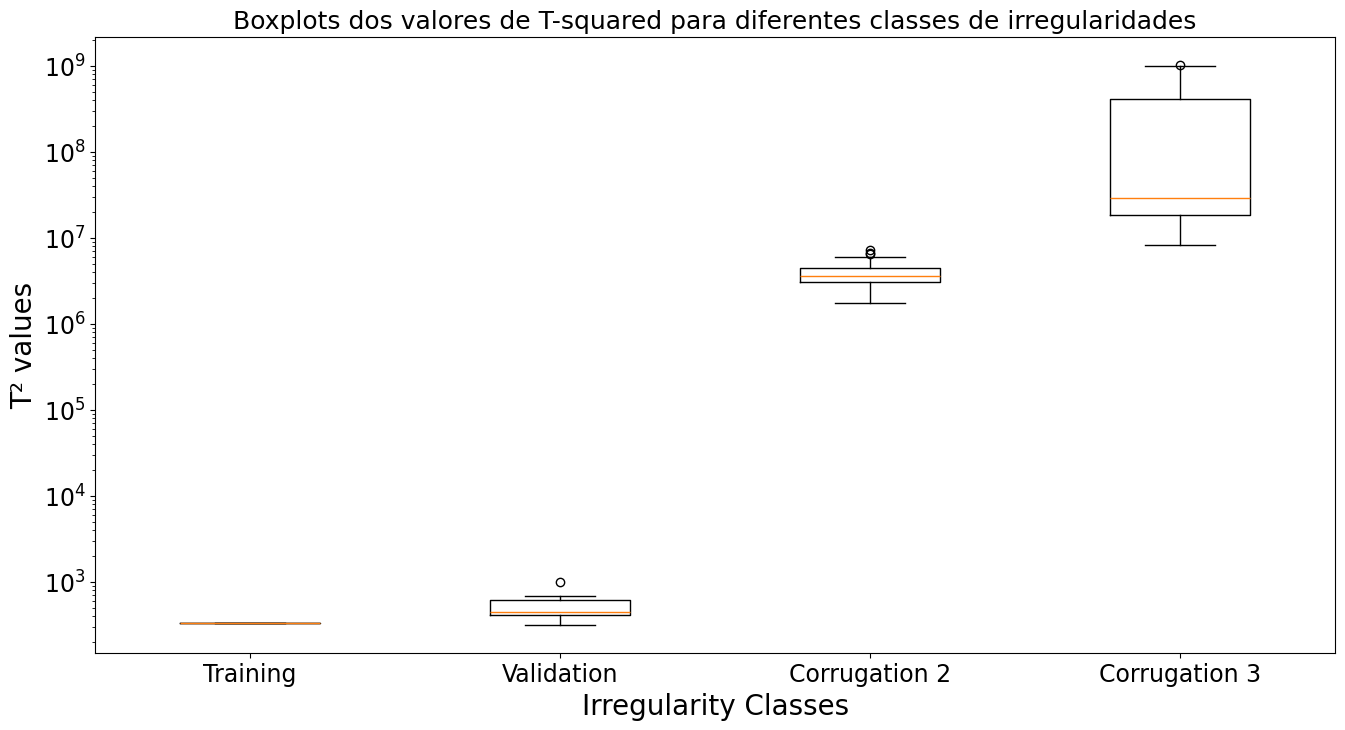

In [ ]:
def plot_t_squared_boxplots():
    import matplotlib.pyplot as plt

    # Dados para os boxplots
    data = [T_squared_train, T_squared_test, T_squared_corr2, T_squared_corr3]
    labels = ['Training', 'Validation', 'Corrugation 2', 'Corrugation 3']

    plt.figure(figsize=(16, 8))
    plt.boxplot(data, labels=labels)

    # Configurar a escala logarítmica no eixo y
    plt.yscale('log')

    # Ajustar títulos e legendas
    plt.xlabel('Irregularity Classes', fontsize=fontsize)
    plt.ylabel('T² values', fontsize=fontsize)
    plt.title('Boxplots dos valores de T-squared para diferentes classes de irregularidades', fontsize=fontsize - 2)

    # Configuração do tamanho das fontes nos ticks
    plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    plt.tick_params(axis='both', which='minor', labelsize=tick_fontsize - 2)

    plt.show()

# Chamar a função de plotagem dos boxplots
plot_t_squared_boxplots()

In [ ]:

# Termina a contagem do tempo
end_time = time.time()

# Calcula o tempo decorrido
tempo_decorrido = end_time - start_time

print(f"Tempo de execução: {tempo_decorrido} segundos")

Tempo de execução: 12792.10935139656 segundos
